In [1]:
import os
from rdkit import Chem

In [5]:
sdf_supp = Chem.SDMolSupplier("data/hFE_benzenes.sdf")
mols = [mol for mol in sdf_supp]


In [14]:

Chem.MolToSmiles(mols[0])

'OC1CCC(O)CC1'

## Read Data:


['/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/_O6T_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/_O70_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/_O71_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/_P8I_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/6J29_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmaker/6KET_unitedatom_optimised_geometry.pdb',
 '/home/riesbenj/Code/OpenFE/validation-benchmarks/solvation_FE/data/hydration_free_energies_Restraintmake

In [22]:
data = (
"1 _O6T 1,2-dimethoxybenzene COc1ccccc1OC -5.33 0.1",
"2 _O70 (2R,5R)-2-methyl-5-prop-1-en-2-ylcyclohexan-1-one C=C(C)[C@@H]1CC[C@@H](C)C(=O)C1  -2.53 0.25",
"3 _O71 (1S,5R)-2-methyl-5-prop-1-en-2-ylcyclohex-2-en-1-ol C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1 -3.20 0.28",
"4 _P8I cyclopentanone O=C1CCCC1 -4.70, 0.60",
"5 6J29 1-amino-4-hydroxyanthracene-9,10-dione Nc1ccc(O)c2c1C(=O)c1ccccc1C2=O -9.5 0.29",
"6 6KET 3-methoxyphenol COc1cccc(O)c1 -7.66 0.6",
"7 8018 (1R,2S,3R,4R,6S,7S)-1,3,4,7,8,9,10,10-octachlorotricyclo[5.2.1.02,6]dec-8-ene ClC1=C(Cl)[C@]2(Cl)[C@H]3C[C@@H](Cl)[C@H](Cl)[C@H]3[C@@]1(Cl)C2(Cl)Cl -3.44 0.1",
"8 E1VB [1,2,2-Trifluoroethoxy]benzene FC(F)[C@@H](F)Oc1ccccc1 -1.29 0.6",
"9 F313 4-methoxyaniline COc1ccc(N)cc1 -7.48  0.60",
"10 G078 1,4-dimethylnaphthalene Cc1ccc(C)c2ccccc12 -2.82 0.60",
"11 G277 cyclohexa-2,5-diene-1,4-dione O=C1C=CC(=O)C=C1 -5.78 0.19",
"12 M030 1,3,5-trimethylbenzene Cc1cc(C)cc(C)c1 -1.21 0.60",
"13 M097 2-chloroaniline Nc1ccccc1Cl -4.91 0.60",
"14 M218 N-methylaniline CNc1ccccc1  -4.69 0.60",
"15 S002 Benzylbromide BrCc1ccccc1 -2.38 0.20",
"16 TVVS pyridine-4-carbaldehyde O=Cc1ccncc1 -7.00 0.60",)

mols_dict = {}
field_data = list(map(lambda x: x.split(), data))
for id, name, iupac, csmile, dg, err in field_data:
    mols_dict["lig_"+str(id)] = {"id": id, 
                                 "name":name, 
                                 "iupac": iupac, 
                                 "smiles": csmile,
                                 "doi": "10.1007/s10822-022-00445-6",
                                 "comment":"united atom, Fig. 13 and Table S2 ",
                                 "error": err,
                                 "type":"hydration FE",
                                 "unit":"kcal/mol",
                                 "value":dg,
                                 "mol": Chem.MolFromSmiles(csmile)}

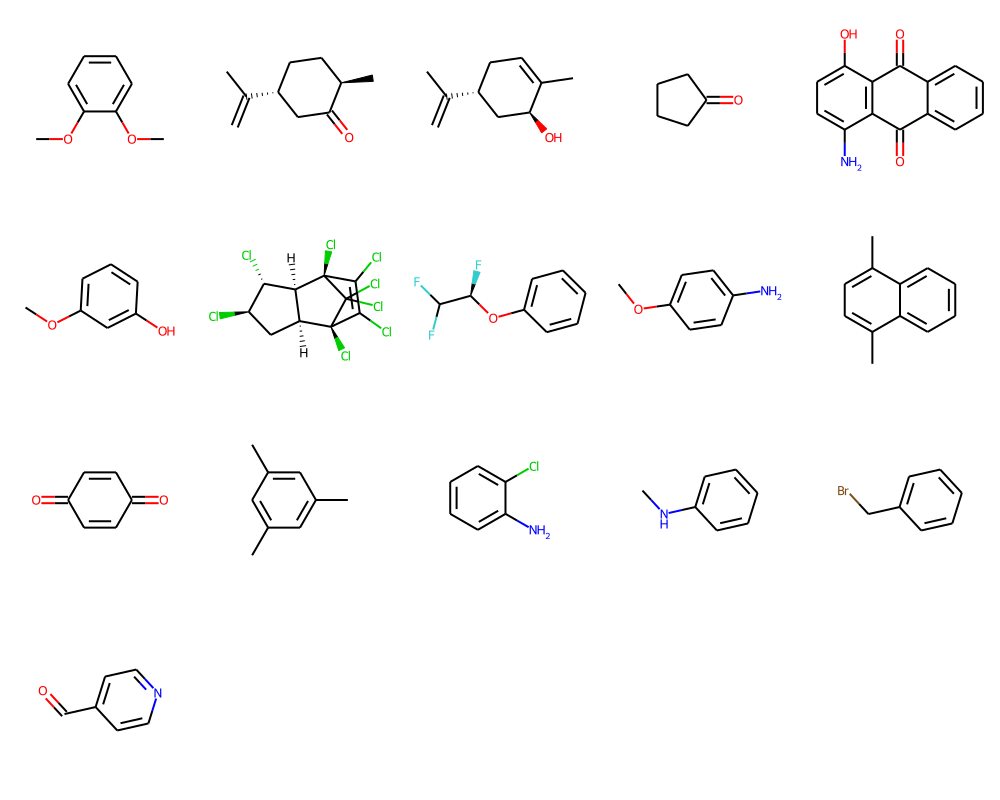

In [13]:
mols = [mols_dict[m]['mol'] for m in mols_dict]
Chem.Draw.MolsToGridImage(mols, molsPerRow=5 )

In [28]:
out_sdf = Chem.SDWriter(open("data/RHFE_benzenes.sdf", "w"))
for mol in mols_dict:
    m = mols_dict[mol]['mol']
    m.SetProp("_Name", mols_dict[mol]['name'])     
    [m.SetProp(str(k), str(v)) for k,v in mols_dict[mol].items() if(k!="mol")]
    m.SetProp("key", mol)
    out_sdf.write(m)
    
out_sdf.close()

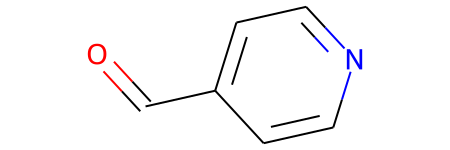

In [25]:
m

In [26]:
import yaml

clean_mols_dict = {}
for mol, mol_dict in mols_dict.items():
    clean_mols_dict[mol] = {key:val for key, val in mol_dict.items() if(key!="mol")}
                            
with open("RHFE_benzenes.yml", "w") as file:
    yaml.dump(clean_mols_dict, file)

None


In [31]:
outputs